Problem 2 (25 Points): Implementing Label Spreading
In this problem, you will implement Label Spreading to classify data points from two circles (See left figure
in Figure 1). As both label groups lie inside their own distinct shape, we can see that Label Spreading can
propagate labels correctly around the circle (See right figure in Figure 1).

The following sample code is used to generate the two circles.

In [1]:
import numpy as np
from sklearn.datasets import make_circles

n_samples = 200
X, y = make_circles(n_samples=n_samples, shuffle=False)
outer, inner = 0, 1
labels = np.full(n_samples, -1.0)
labels[0] = outer
labels[-1] = inner

Displaying the circles

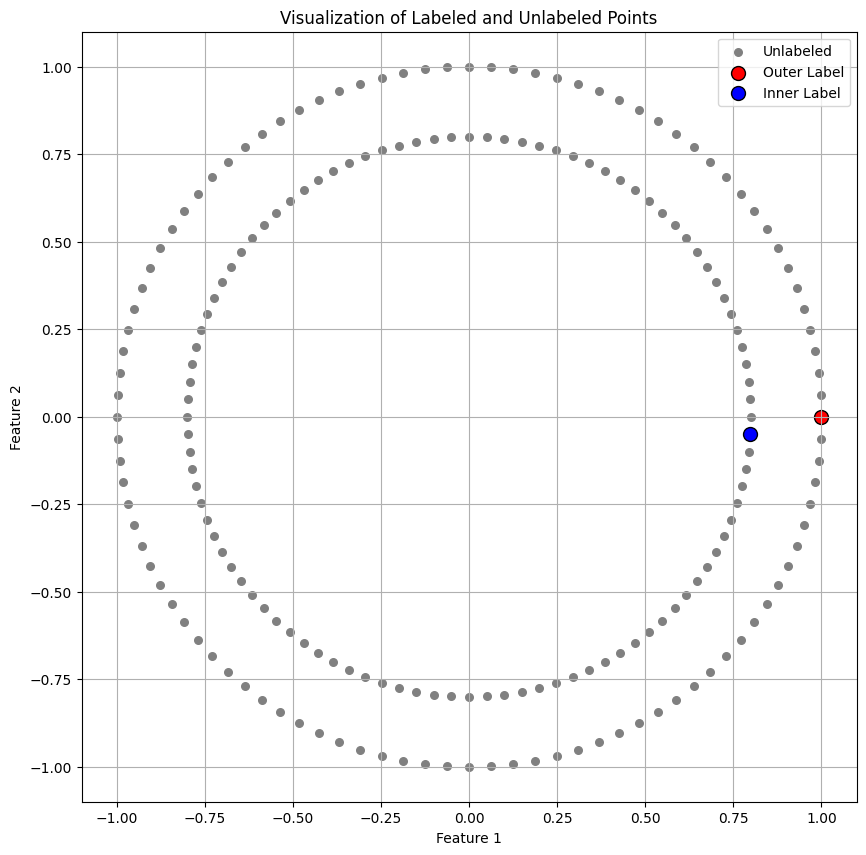

In [8]:
import matplotlib.pyplot as plt

# Create masks for different types of points
mask_labelled = (labels == 0) | (labels == 1)
mask_unlabelled = (labels == -1)
mask_outer = (labels == 0)
mask_inner = (labels == 1)

# Plot
plt.figure(figsize=(10, 10))
plt.scatter(X[mask_unlabelled, 0], X[mask_unlabelled, 1], color='gray', label='Unlabeled', s=30)
plt.scatter(X[mask_outer, 0], X[mask_outer, 1], color='red', label='Outer Label', s=100, edgecolor='black')
plt.scatter(X[mask_inner, 0], X[mask_inner, 1], color='blue', label='Inner Label', s=100, edgecolor='black')

plt.title('Visualization of Labeled and Unlabeled Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

First Attempt

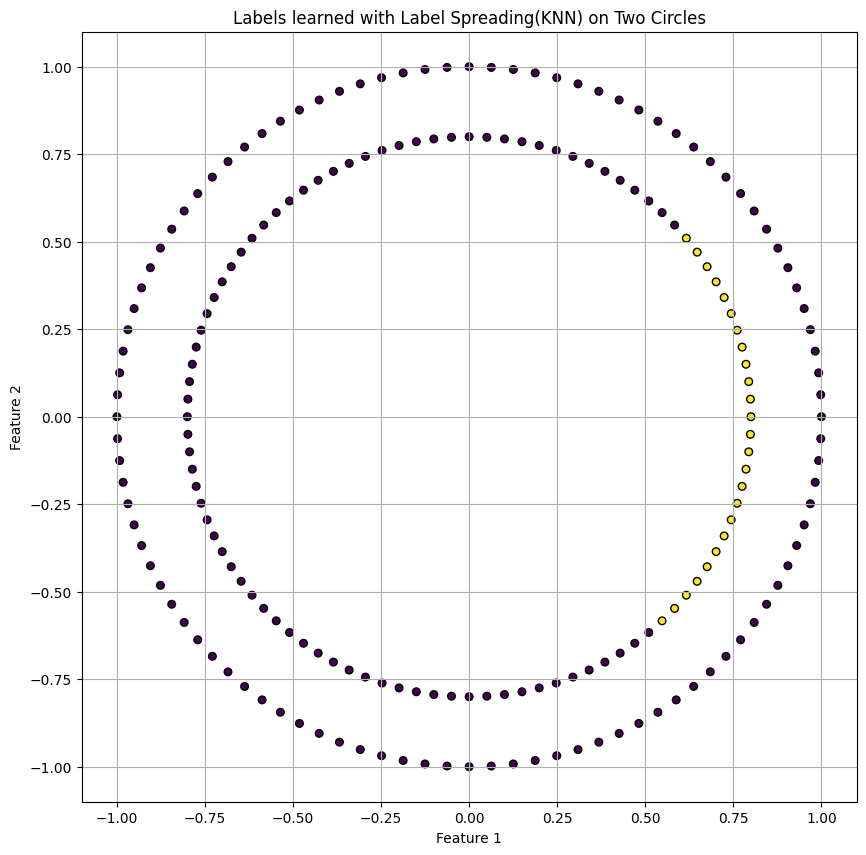

In [23]:
from sklearn.semi_supervised import LabelSpreading

# Initialize and fit the Label Spreading model with KNN kernel's default values
label_spreading = LabelSpreading(kernel='knn',n_neighbors=7,alpha=0.2)
label_spreading.fit(X, labels)

# Predict labels for all data points
predicted_labels = label_spreading.transduction_

# Plot the results
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, s=30, edgecolor='k')
plt.title('Labels learned with Label Spreading(KNN) on Two Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

Final Iteration

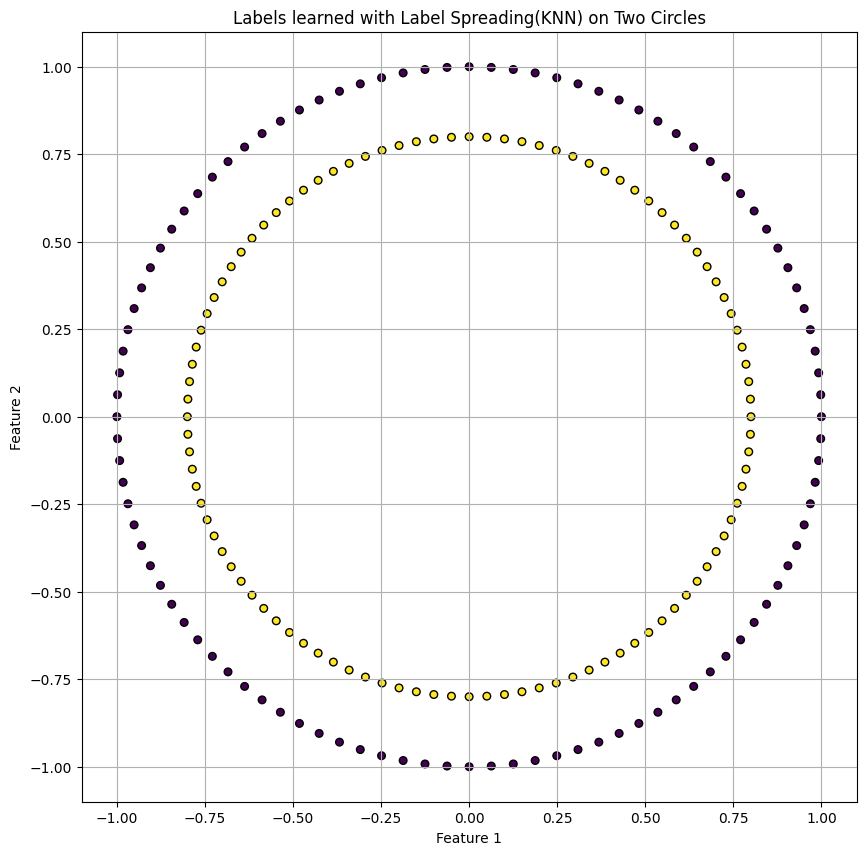

In [18]:
from sklearn.semi_supervised import LabelSpreading

# Initialize and fit the Label Spreading model
label_spreading = LabelSpreading(kernel='knn', n_neighbors=7,alpha=0.8)
label_spreading.fit(X, labels)

# Predict labels for all data points
predicted_labels = label_spreading.transduction_

# Plot the results
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, s=30, edgecolor='k')
plt.title('Labels learned with Label Spreading(KNN) on Two Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

Reference
https://scikit-learn.org/dev/modules/generated/sklearn.semi_supervised.LabelSpreading.html